In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json, pickle

## Write test data
<h3><font color="red">WARNING: this will update test files.</font></h3>

This may cause tests that depend on fit-values to fail.  To run, uncomment `write_new_test_data()` below.

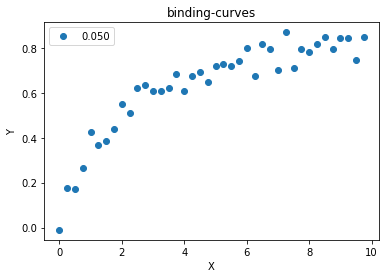

In [7]:
    
def model(K,X):
    """
    Simple, saturating binding curve.

    K: association constant
    X: vector of X concentrations
    """

    return K*X/(1 + K*X)

def write_new_test_data(K=0.5,noise=0.05,prefix="binding-curves"):
       

    test_files = []
    X_concs = np.arange(0,10,0.25)
    fig, ax = plt.subplots()

    name = f"{noise:.3f}"

    frac_sat = model(K,X_concs) + np.random.normal(0,noise,len(X_concs))

    df = pd.DataFrame({"X":X_concs,
                       "Y":frac_sat})

    ax.plot(df.X,df.Y,"o",label=name)

    csv_out = f"{prefix}_noise-{name}.csv"

    df.to_csv(csv_out)

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"{prefix}")
    fig.savefig(f"{prefix}.pdf")
    
    json_dict = {"input_params":(K,),
                 "test_file":csv_out}
    
    json.dump(json_dict,open(f"{prefix}.json","w"))
    
    plt.show()
    
    
#write_new_test_data()